# Fashion MNIST with Keras
This is my first attempt with building model using Artificial Neural Networks following the book "Hands On Machine Learning with Scikit Learn Keras and Tensorflow".

In [1]:
import numpy as np
import os

%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
tf.__version__

'2.13.0'

In [2]:
import keras
keras.__version__

'2.13.1'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

Let's divide training data into validation sets. Also we can scale the intensity ranging from 0 to 255 by dividing by 255.

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [7]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Allegedly the classes correspond as follows in array:

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Coat


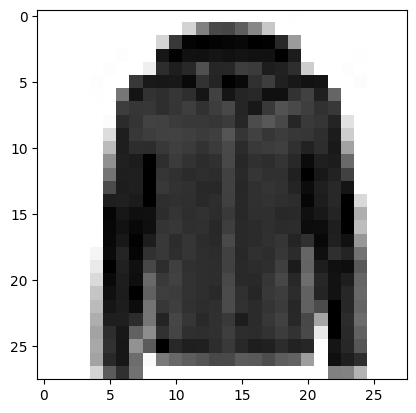

In [9]:
print(class_names[y_train[0]])
plt.imshow(X_train[0], cmap='binary')

We can display some of the images.

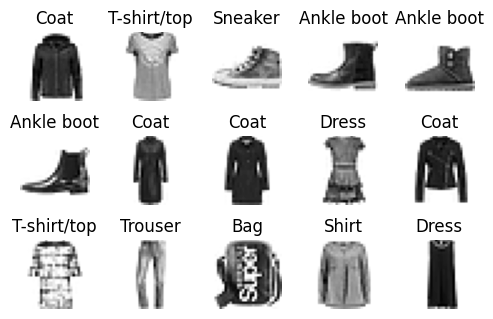

In [10]:
n_rows = 3
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap='binary')
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Now let's build a ANN model using Sequential API.

In [11]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

Let's explain what happened (with own words, not from book, in order to understand it better):  
- Sequential model is created (simplest Keras model) with layers on top of each other.  
- First layer is built which purpose is to flatten a 28x28 2D array into 1D array and rescales values from -1 to 1.  
- Next, the dense layers with corresponding number of neurons and name of activation function.  
- To the last layer we choose softmax function because there are multiple classes and they are exclusive (we calculate probability).

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.layers

In [14]:
model.layers[0].name

'flatten'

In [15]:
model.get_layer('dense')

In [16]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
weights

array([[ 0.0596652 ,  0.00124522, -0.07209052, ...,  0.00211272,
        -0.01492387, -0.00438226],
       [-0.02418824, -0.0279798 ,  0.03144582, ..., -0.05555317,
         0.04047312, -0.07021818],
       [-0.03816931,  0.05993924, -0.06979618, ..., -0.05160797,
        -0.01090229,  0.03470796],
       ...,
       [ 0.03057913,  0.01527593, -0.02937507, ...,  0.01630059,
         0.07072715, -0.07201538],
       [-0.00900104,  0.02951151, -0.05966569, ..., -0.05865791,
        -0.0437807 ,  0.03252127],
       [-0.04142133, -0.0342005 , -0.00429071, ..., -0.04788252,
         0.03048687, -0.07171829]], dtype=float32)

In [17]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
weights.shape

(784, 300)

In [19]:
biases.shape

(300,)

The weights are selected randomly (in order to break symmetry).

# Building first model
Now, we have can call compile() method in order to specify cost function and optimizer. We can also use additional metrics for extra feedback.

In [20]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

We use in compilation sparce categorical crossentropy because the category is chosen by an integer (i.e from 0 to 9). If it was one hot encoded (array with only zeros and 1 in the right place), then we would use categorical_crossentropy.  
Besides that, the model after compilation is ready to be trained.  
  
We train neural networks model calling fit() method. In it, as arguments go: input features, target classes, number of epochs, optionally validation set.

In [21]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7174 - accuracy: 0.7617 - val_loss: 0.5159 - val_accuracy: 0.8278
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4895 - accuracy: 0.8284 - val_loss: 0.4343 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4445 - accuracy: 0.8433 - val_loss: 0.4116 - val_accuracy: 0.8604
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4164 - accuracy: 0.8536 - val_loss: 0.4011 - val_accuracy: 0.8614
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3968 - accuracy: 0.8613 - val_loss: 0.3834 - val_accuracy: 0.8708
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3809 - accuracy: 0.8659 - val_loss: 0.3763 - val_accuracy: 0.8732
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3669 - accuracy: 0.8700 - val_loss: 0.3777 - val_accuracy:

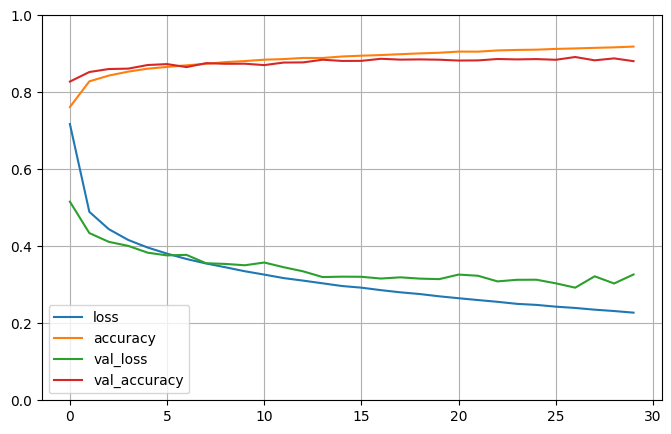

In [22]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Training and validation accuracy steadily rise while training and validation loss decrease.  
However it seems like validation loss is at a plateau after around 20th epoch, which may mean slight overfitting.

For now, let's check how the model performs in the test set.

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3637 - accuracy: 0.8676


[0.36372002959251404, 0.8676000237464905]

Let's gain insight how the model predicts the outcome.

In [24]:
# I will use 3 of the already predicted instances from X_test
y_proba = model.predict(X_test[:3])
y_proba.round(2)

1/1 [==============================] - 0s 76ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

The values differ slightly from the book - first row's 9th class in my case has 97% probability and in book there is only 79%. In my case loss on the test is lesser and accuracy is greater (not much but still). The parameters were not changed in any of the places from book, hence it may be due to some optimizations done in newer Keras and TF versions.

In [25]:
# we can predict only classes if we want, however predict_classes is depricated
y_pred = np.argmax(model.predict(X_test[:3]), axis=-1)
print(y_pred)
np.array(class_names)[y_pred]

1/1 [==============================] - 0s 25ms/step
[9 2 1]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [26]:
np.array(class_names)[y_test[:3]]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')